In [ ]:
# Loading the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Loading csv file
df = pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
# Exploring the data
# But this is the total number of labels that
# can be assigned to whole of the dataset
print(f"The number of data points {len(df)}")

The number of data points 22184


<Axes: >

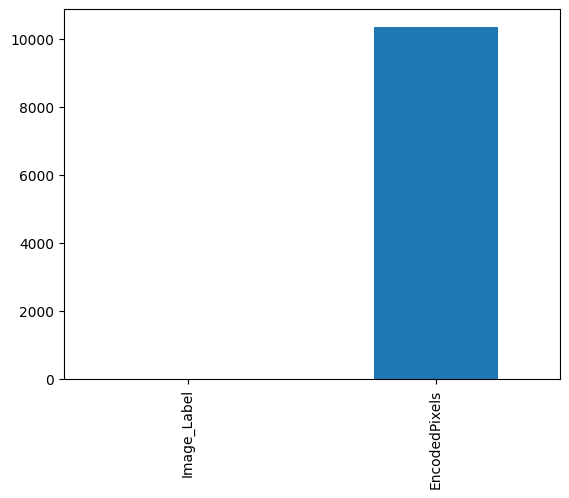

In [ ]:
# Null values in each of the columns
df.isna().sum().plot(kind="bar")

Text(0.5, 1.0, 'Null value percentage')

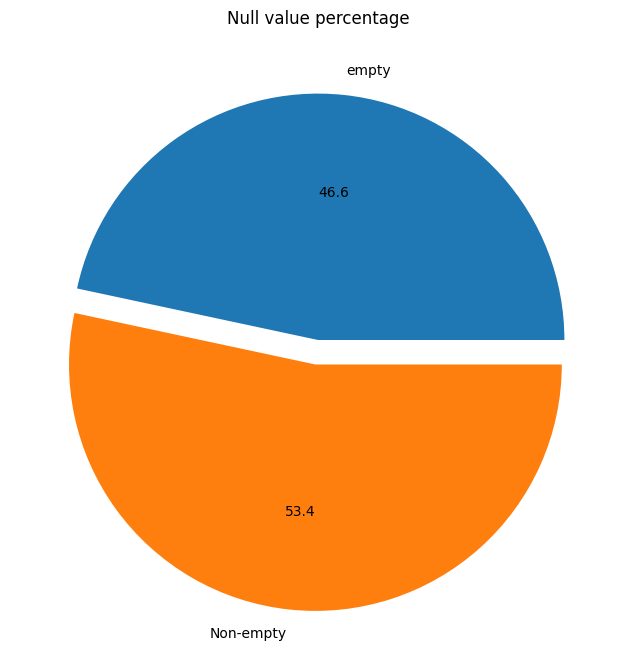

In [ ]:
# Percentage of null values
size = [len(df)-df.EncodedPixels.count(),df.EncodedPixels.count()]
plt.figure(figsize=(8,8))
plt.pie(size, labels=["empty","Non-empty"],explode=(0,0.1), autopct="%1.1f")
plt.title("Null value percentage")

In [ ]:
# Replacing the nan values with 0s
df["EncodedPixels"] = df['EncodedPixels'].fillna(-1)

In [ ]:
# creating a new columns with label
df["Label"] = df["Image_Label"].apply(lambda x: x.split("_")[1])
df.head()

Image_Label                                      EncodedPixels  \
0    0011165.jpg_Fish  264918 937 266318 937 267718 937 269118 937 27...   
1  0011165.jpg_Flower  1355565 1002 1356965 1002 1358365 1002 1359765...   
2  0011165.jpg_Gravel                                                 -1   
3   0011165.jpg_Sugar                                                 -1   
4    002be4f.jpg_Fish  233813 878 235213 878 236613 878 238010 881 23...   

    Label  
0    Fish  
1  Flower  
2  Gravel  
3   Sugar  
4    Fish

In [ ]:
# Creating an new feature with just the image names
df["Image_name"] = df["Image_Label"].apply(lambda x: x.split("_")[0])
#df.drop("Image_Label",axis=1,inplace=True)
df.head()

Image_Label                                      EncodedPixels  \
0    0011165.jpg_Fish  264918 937 266318 937 267718 937 269118 937 27...   
1  0011165.jpg_Flower  1355565 1002 1356965 1002 1358365 1002 1359765...   
2  0011165.jpg_Gravel                                                 -1   
3   0011165.jpg_Sugar                                                 -1   
4    002be4f.jpg_Fish  233813 878 235213 878 236613 878 238010 881 23...   

    Label   Image_name  
0    Fish  0011165.jpg  
1  Flower  0011165.jpg  
2  Gravel  0011165.jpg  
3   Sugar  0011165.jpg  
4    Fish  002be4f.jpg

{'Fish': 2781, 'Flower': 2365, 'Gravel': 2939, 'Sugar': 3751}


<Axes: title={'center': 'Number of each classes'}>

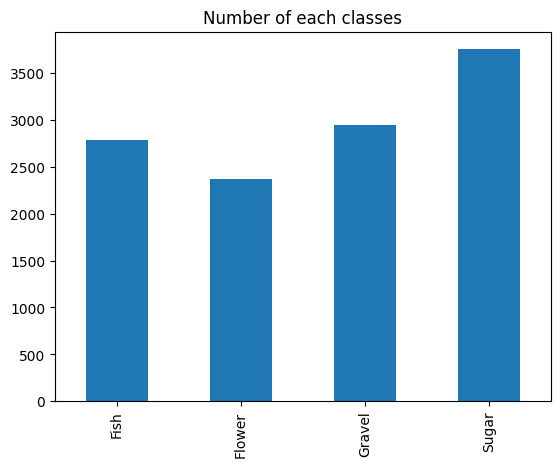

In [ ]:
# Lets check the number of each corresponding labels
def check_num(label):
  return df[(df["Label"]==label) & (df["EncodedPixels"]!=-1)]["EncodedPixels"].count()

values = {}
for i in df.Label.unique():
  values[i] = check_num(i)

print(values)
plt.title("Number of each classes")
pd.Series(values).plot(kind="bar")

In [ ]:
def dummy_var(label):
  values = []
  df_temp = df[df["Label"]==label]
  df_temp["Dummy"] = df_temp["EncodedPixels"].apply(lambda x: 1 if x!=-1 else 0)
  return list(df_temp["Dummy"])

df_images = pd.DataFrame()
df_images["Image"] = df["Image_name"].unique()
for i in df["Label"].unique():
  df_images[i] = dummy_var(i)

df_images.head()

<ipython-input-11-b723581ff755>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["Dummy"] = df_temp["EncodedPixels"].apply(lambda x: 1 if x!=-1 else 0)
<ipython-input-11-b723581ff755>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["Dummy"] = df_temp["EncodedPixels"].apply(lambda x: 1 if x!=-1 else 0)
<ipython-input-11-b723581ff755>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Image  Fish  Flower  Gravel  Sugar
0  0011165.jpg     1       1       0      0
1  002be4f.jpg     1       1       0      1
2  0031ae9.jpg     1       1       0      1
3  0035239.jpg     0       1       1      0
4  003994e.jpg     1       0       1      1

In [ ]:
# Number of images available for us
print(f"Number of images: {len(df_images)}")

Number of images: 5546


<Axes: title={'center': 'Number of labels per image'}, ylabel='count'>

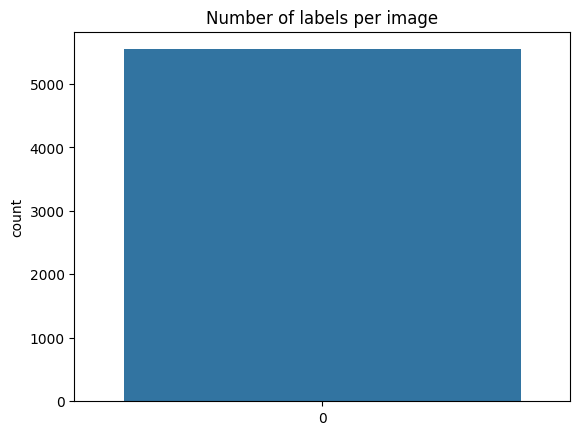

In [ ]:
df_images["Total"] = df_images["Fish"]+df_images["Flower"]+df_images["Gravel"]+df_images["Sugar"]
plt.title("Number of labels per image")
sns.countplot(df_images["Total"])

In [ ]:
# Create one column for each mask
train_df = pd.pivot_table(df, index=['Image_name'], values=['EncodedPixels'], columns=['Label'], aggfunc=np.min).reset_index()
train_df.columns = ['image', 'Fish_mask', 'Flower_mask', 'Gravel_mask', 'Sugar_mask']

train_df.head()

image                                          Fish_mask  \
0  0011165.jpg  264918 937 266318 937 267718 937 269118 937 27...   
1  002be4f.jpg  233813 878 235213 878 236613 878 238010 881 23...   
2  0031ae9.jpg  3510 690 4910 690 6310 690 7710 690 9110 690 1...   
3  0035239.jpg                                                 -1   
4  003994e.jpg  2367966 18 2367985 2 2367993 8 2368002 62 2369...   

                                         Flower_mask  \
0  1355565 1002 1356965 1002 1358365 1002 1359765...   
1  1339279 519 1340679 519 1342079 519 1343479 51...   
2  2047 703 3447 703 4847 703 6247 703 7647 703 9...   
3  100812 462 102212 462 103612 462 105012 462 10...   
4                                                 -1   

                                         Gravel_mask  \
0                                                 -1   
1                                                 -1   
2                                                 -1   
3  65400 380 66800 380 68200 380 69600 380 71000 ...   
4  353317 416 354717 416 356117 416 357517 416 35...   

                                          Sugar_mask  
0                                                 -1  
1  67495 350 68895 350 70295 350 71695 350 73095 ...  
2  658170 388 659570 388 660970 388 662370 388 66...  
3                                                 -1  
4  28011 489 29411 489 30811 489 32211 489 33611 ...

In [ ]:
# dimenesions of image
width = 2100
height = 1400

In [ ]:
# Function to decode the encoded pixels
def decode_pixels(pix, rows=2100, cols=1400,label=255):
  # coverting the string into a list of numbers
  rle_numbers = [int(num_string) for num_string in pix.split(' ')]
  # Coverting them into starting index and length pairs
  rle_pairs = np.array(rle_numbers).reshape(-1,2)
  # Creating a blank image in form of a single row array
  img = np.zeros(rows*cols, dtype=np.uint8)

  # Setting the segmented pixels in the img
  for ind, length in rle_pairs:
    ind -= 1
    img[ind:ind+length] = label
  img = img.reshape(rows,cols)
  img = img.T
  return img

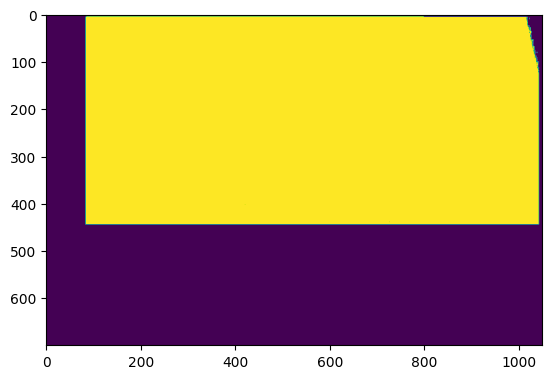

In [ ]:
# Testing the function out
seg = decode_pixels(df["EncodedPixels"][4])
seg = cv2.resize(seg, (1050,700))
plt.imshow(seg)

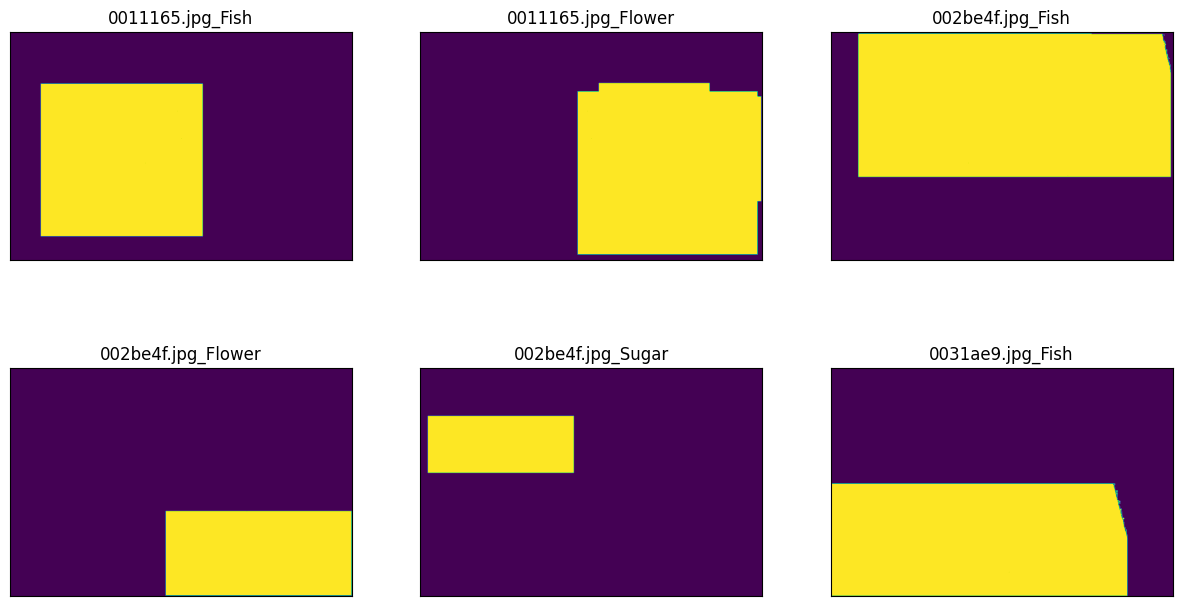

In [ ]:
# Sample of the segment regions
plt.figure(figsize=(15,8))
j = 0
for i in range(6):
  plt.subplot(2,3,i+1)
  while True:
    if df["EncodedPixels"][j]!=-1:
      break
    j+=1
  plt.imshow(decode_pixels(df["EncodedPixels"][j]))
  plt.title(df["Image_name"][j]+"_"+df["Label"][j])
  j+=1
  plt.xticks([])
  plt.yticks([])
plt.show()

In [ ]:
# location of img directory
img_dir = "/content/drive/MyDrive/train_images"

In [ ]:
# Seeing the cloumns of train.csv
df.columns

Index(['Image_Label', 'EncodedPixels', 'Label', 'Image_name'], dtype='object')

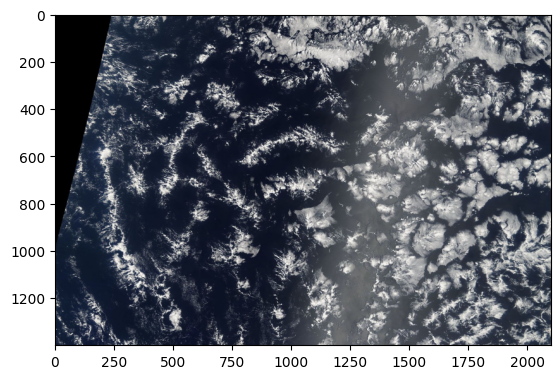

In [ ]:
# Displaying one image
path = os.path.join(img_dir,df["Image_name"][0])
img = cv2.imread(path,1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

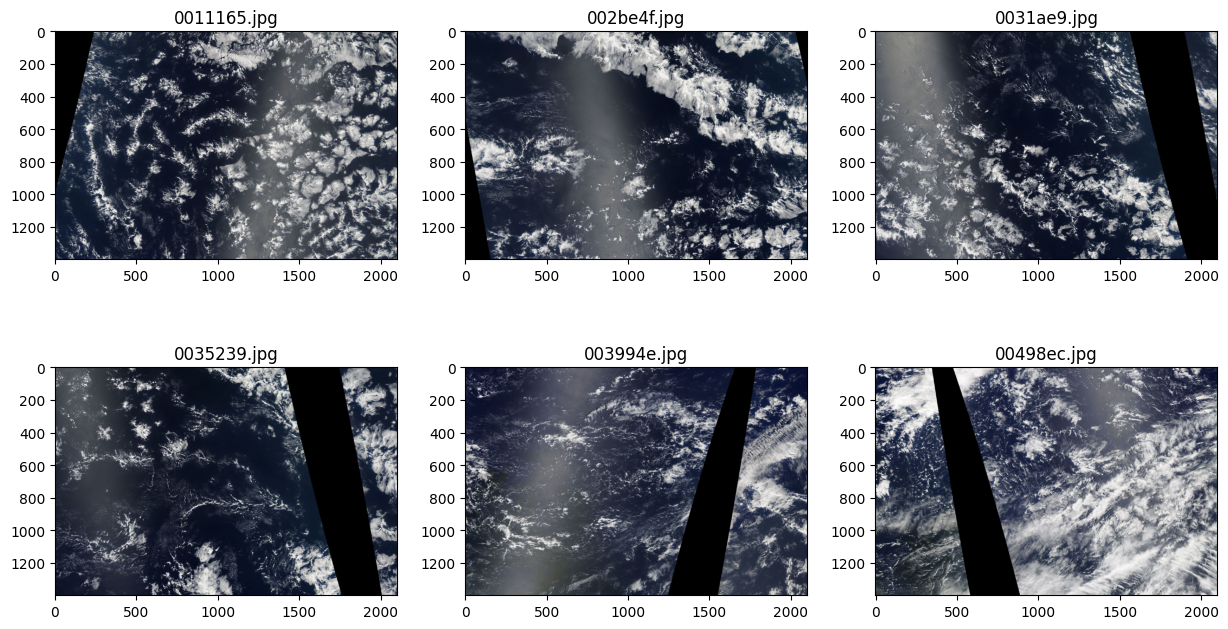

In [ ]:
# Displaying sample images
imgs = df["Image_name"].unique()[:6]
plt.figure(figsize=(15,8))
for i in range(len(imgs)):
  plt.subplot(2,3,i+1)
  path = os.path.join(img_dir,imgs[i])
  img = cv2.imread(path,1)
  plt.title(imgs[i])
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

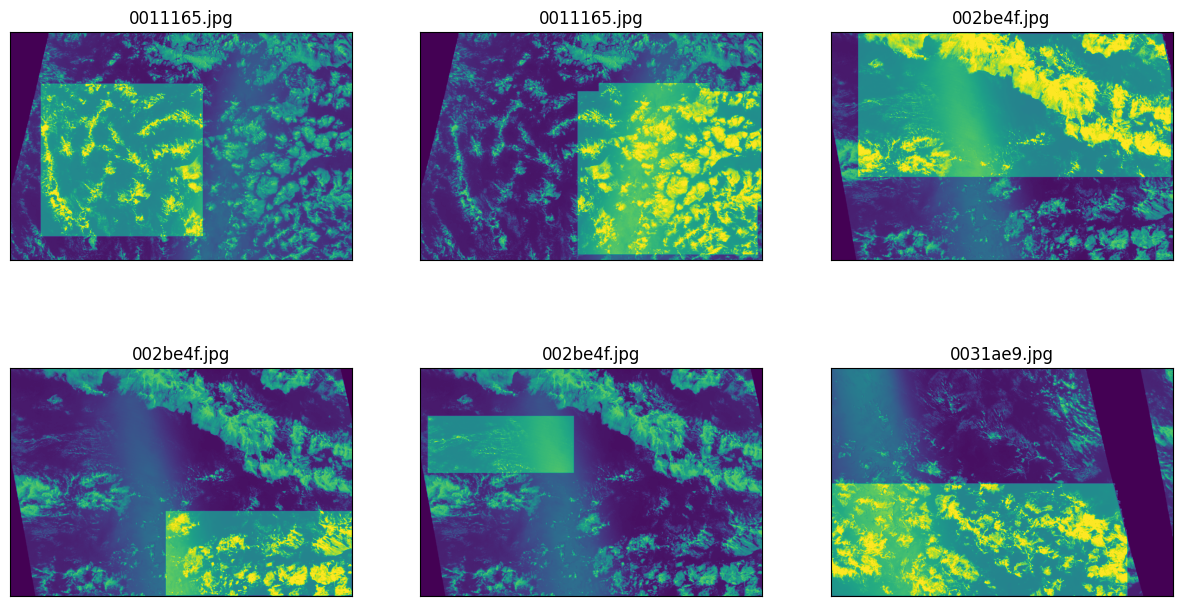

In [ ]:
# Sample image with masks overlayed
plt.figure(figsize=(15,8))
j = 0
for i in range(6):
  plt.subplot(2,3,i+1)
  while True:
    if df["EncodedPixels"][j]!=-1:
      break
    j+=1
  seg = decode_pixels(df["EncodedPixels"][j])
  path = os.path.join(img_dir,df["Image_name"][j])
  img = cv2.imread(path,0)
  dest = cv2.addWeighted(img, 0.8, seg, 0.4, 0.0)
  plt.imshow(dest)
  plt.title(df["Image_name"][j])
  j+=1
  plt.xticks([])
  plt.yticks([])
plt.show()

In [ ]:
# Function to preprocess the data
BASE_DIR = "/content/drive/MyDrive/train_images"
labels = list(df["Label"].unique())
def preprocess(df):
  data = []
  for i in range(len(df)):
    if i % 100 == 0:
      print(f"{i} completed")
    path = os.path.join(BASE_DIR,df["image"][i])
    img_arr = cv2.imread(path,1)
    img_arr = cv2.resize(img_arr,(480,384))
    channels = []
    for j in df.columns[1:]:
      #print(type(df[j][i]),j,i)
      if type(df[j][i]) is not str:
            arr = np.zeros(384*480, dtype=np.uint8)
            arr = arr.reshape(480,384)
            #img = img.T
            channels.append(arr.T)
            continue
      arr = decode_pixels(df[j][i],label=1)
      arr = cv2.resize(arr,(480,384))
      channels.append(arr)

    data.append([img_arr/255,np.dstack(channels)])
  return data

In [ ]:
# Sanity check on the output
data = preprocess(train_df[:5])
len(data)

0 completed


5

In [ ]:
# Checking the shape of image
data[1][0].shape

(384, 480, 3)

In [ ]:
# Checking the shape of segmentation mask
data[1][1].shape

(384, 480, 4)

In [ ]:
img_dir = "/content/drive/MyDrive/train_images"
masks_dir = "./masks"

In [ ]:
# utility function for Data Generators
BASE_DIR = "/content/drive/MyDrive/train_images"
labels = list(df["Label"].unique())

def preprocess1(df):
    # To store the data
    data = []
    # Iterating through each of the rows in the dataframe
    for i in range(len(df)):
        # Getting the path of the image
        path = os.path.join(BASE_DIR,df.iloc[i]["image"])
        # Reading in the image
        img_arr = cv2.imread(path,1)
        # Resizing it to the proper size
        img_arr = cv2.resize(img_arr,(480,384))
        # To store the differnt segmentation maps
        channels = []
        # Getting the differnt segmentation maps
        for j in df.columns[1:]:
          # making an empty map if the image doesn't contain a label
          if type(df.iloc[i][j]) is not str:
                arr = np.zeros(384*480, dtype=np.uint8)
                arr = arr.reshape(480,384)
                channels.append(arr.T)
                continue
          # Creating the segmentation map
          arr = decode_pixels(df.iloc[i][j],label=1)
          # Resizing it to proper size
          arr = cv2.resize(arr,(480,384))
          channels.append(arr)
        # Adding to the data list as [image, output seg map]
        data.append([img_arr/255,np.dstack(channels)])
    # Spliting the data into input and output
    imgs = []
    masks = []
    for i, j in data:
        imgs.append(i)
        masks.append(j)

    return np.array(imgs), np.array(masks).astype(np.float)

In [ ]:
# Creating a custom Data Generator
def data_gen(img_folder, df, batch_size):

    c = 0
    n = list(df["image"])
    while True:
        c1 = c+batch_size

        if c1 > len(df):
            c1 = len(df)
        imgs, masks = preprocess1(df.iloc[c:c1])
        c = c1
        if c1 >= len(df):
            c = 0
        if imgs.shape == (batch_size,384, 480, 3) and masks.shape == (batch_size,384, 480, 4):
            yield imgs, masks
        else:
            continue


In [ ]:
# Sample check to see if the code is working
this = data_gen(img_folder=img_dir, df=train_df, batch_size=8)

In [ ]:
# Checking
k = 0
for i,j in this:
    if k == 5:
        break
    print(i.shape,j.shape)
    k+=1

<ipython-input-29-416dc83a95fb>:40: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(imgs), np.array(masks).astype(np.float)


(8, 384, 480, 3) (8, 384, 480, 4)
(8, 384, 480, 3) (8, 384, 480, 4)
(8, 384, 480, 3) (8, 384, 480, 4)
(8, 384, 480, 3) (8, 384, 480, 4)
(8, 384, 480, 3) (8, 384, 480, 4)


In [ ]:
# Installing the segmentation_models library
! pip install segmentation_models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 7.2 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 40.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.6.3
    Uninstalling typing_extensions-4.6.3:
      Successfully uninstalled typing_extensions-4.6.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [ ]:
!pip install -U tensorflow
!pip install upgrad keras-segmentation

# import tensorflow as tf
# from keras_segmentation import models as sm
# from keras_segmentation import metrics

# tf.keras.backend.clear_session()


ERROR: Could not find a version that satisfies the requirement upgrad (from versions: none)
ERROR: No matching distribution found for upgrad


In [ ]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm
import tensorflow as tf
from tensorflow import keras
tf.compat.v1.enable_eager_execution()
import segmentation_models as sm
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
#import keras
from tensorflow.keras.utils import normalize
from tensorflow.keras.metrics import MeanIoU

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0)
ERROR: No matching distribution found for tensorflow==2.2.1
ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0rc3, 2.6.0, 2.7.0rc0, 2.7.0rc2, 2.7.0, 2.8.0rc0, 2.8.0rc1, 2.8.0

In [ ]:
BACKBONE = 'efficientnetb5'
LEARNING_RATE = 0.002
HEIGHT = 384
WIDTH = 480
CHANNELS = 3
N_CLASSES = 4
ES_PATIENCE = 10
RLROP_PATIENCE = 3
DECAY = 0.0001
DECAY_DROP = 0.2
model_path = f'uNet_%s_%sx%s_lr{LEARNING_RATE}.h5' % (BACKBONE, HEIGHT, WIDTH)





In [ ]:
# Setting up the optimizer
optim = tf.keras.optimizers.Adam(LEARNING_RATE)

# Setting up the metrics
metrics = [sm.metrics.IOUScore(threshold=0.50),sm.metrics.FScore(threshold=0.5)]

# Setting up the Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', mode='min', save_best_only=True, save_weights_only=True)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=ES_PATIENCE, restore_best_weights=True, verbose=1)
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=RLROP_PATIENCE, factor=DECAY_DROP, min_lr=1e-6, verbose=1)

# Final list of call backs
callback_list = [checkpoint, es, rlrop]







In [ ]:
# Defining model
model = sm.Unet(backbone_name=BACKBONE,
                encoder_weights='imagenet',
                classes=N_CLASSES,
                activation='sigmoid', encoder_freeze=True,
                input_shape=(HEIGHT, WIDTH, CHANNELS))

# Compiling the model
model.compile(optimizer=optim, loss=sm.losses.bce_dice_loss, metrics=metrics)

# Model summary
model.summary()

115515256/115515256 [==============================] - 7s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 384, 480, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 192, 240, 48)         1296      ['input_1[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 192, 240, 48)         192       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio

In [ ]:
# Total number of images
print(f"Total size of data {len(train_df)}")

Total size of data 5546


In [ ]:
# Training and Testing Data
train = train_df.iloc[0:4500]
test = train_df.iloc[4500:5000]
batch_size = 8

In [ ]:
# Data Generators
Train_data_generator = data_gen(img_folder=img_dir, df=train, batch_size=batch_size)
Validation_data_generator = data_gen(img_folder=img_dir, df=test, batch_size=batch_size)

In [ ]:
history = model.fit(Train_data_generator,epochs=5,
                             steps_per_epoch=(4500//batch_size),
                             validation_data=Validation_data_generator,
                             validation_steps=(500//batch_size),
                             callbacks=callback_list)

<ipython-input-29-416dc83a95fb>:40: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(imgs), np.array(masks).astype(np.float)


Epoch 1/5
562/562 [==============================] - 6357s 11s/step - loss: 0.9760 - iou_score: 0.2962 - f1-score: 0.4379 - val_loss: 0.9648 - val_iou_score: 0.3500 - val_f1-score: 0.5009 - lr: 0.0020
Epoch 2/5
562/562 [==============================] - 633s 1s/step - loss: 0.8753 - iou_score: 0.3680 - f1-score: 0.5236 - val_loss: 0.8936 - val_iou_score: 0.3713 - val_f1-score: 0.5235 - lr: 0.0020
Epoch 3/5
562/562 [==============================] - 597s 1s/step - loss: 0.8383 - iou_score: 0.3916 - f1-score: 0.5486 - val_loss: 0.8534 - val_iou_score: 0.3924 - val_f1-score: 0.5459 - lr: 0.0020
Epoch 4/5
562/562 [==============================] - 599s 1s/step - loss: 0.8123 - iou_score: 0.4094 - f1-score: 0.5667 - val_loss: 0.8319 - val_iou_score: 0.4033 - val_f1-score: 0.5570 - lr: 0.0020
Epoch 5/5
562/562 [==============================] - 636s 1s/step - loss: 0.7931 - iou_score: 0.4218 - f1-score: 0.5792 - val_loss: 0.8351 - val_iou_score: 0.4014 - val_f1-score: 0.5540 - lr: 0.0020


In [ ]:
res = model.evaluate(Validation_data_generator,steps=500//16)
print(f"Loss:{res[0]}")
print(f"IoU:{res[1]}")
print(f"F1:{res[2]}")

<ipython-input-29-416dc83a95fb>:40: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(imgs), np.array(masks).astype(np.float)


31/31 [==============================] - 19s 636ms/step - loss: 0.8482 - iou_score: 0.3934 - f1-score: 0.5452
Loss:0.8482153415679932
IoU:0.3933699429035187
F1:0.5451632142066956


In [ ]:
model.save(f"clouds_efficientnetb5_iouscore-{str(res[1])[:5]}.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


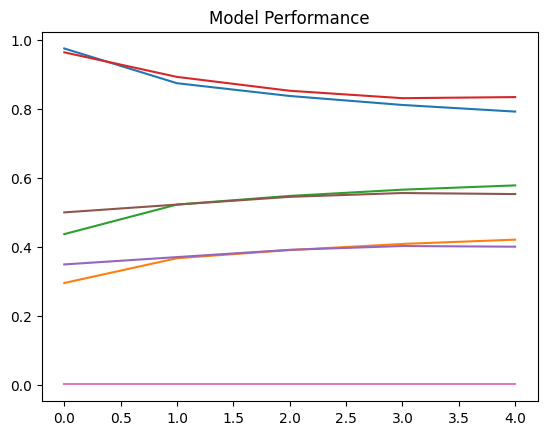

In [ ]:
# All the curves together
df_res = pd.DataFrame(history.history)
plt.title("Model Performance")
plt.plot(df_res)
plt.show()

In [ ]:
# Looking at the columns of the result df
df_res.columns

Index(['loss', 'iou_score', 'f1-score', 'val_loss', 'val_iou_score',
       'val_f1-score', 'lr'],
      dtype='object')

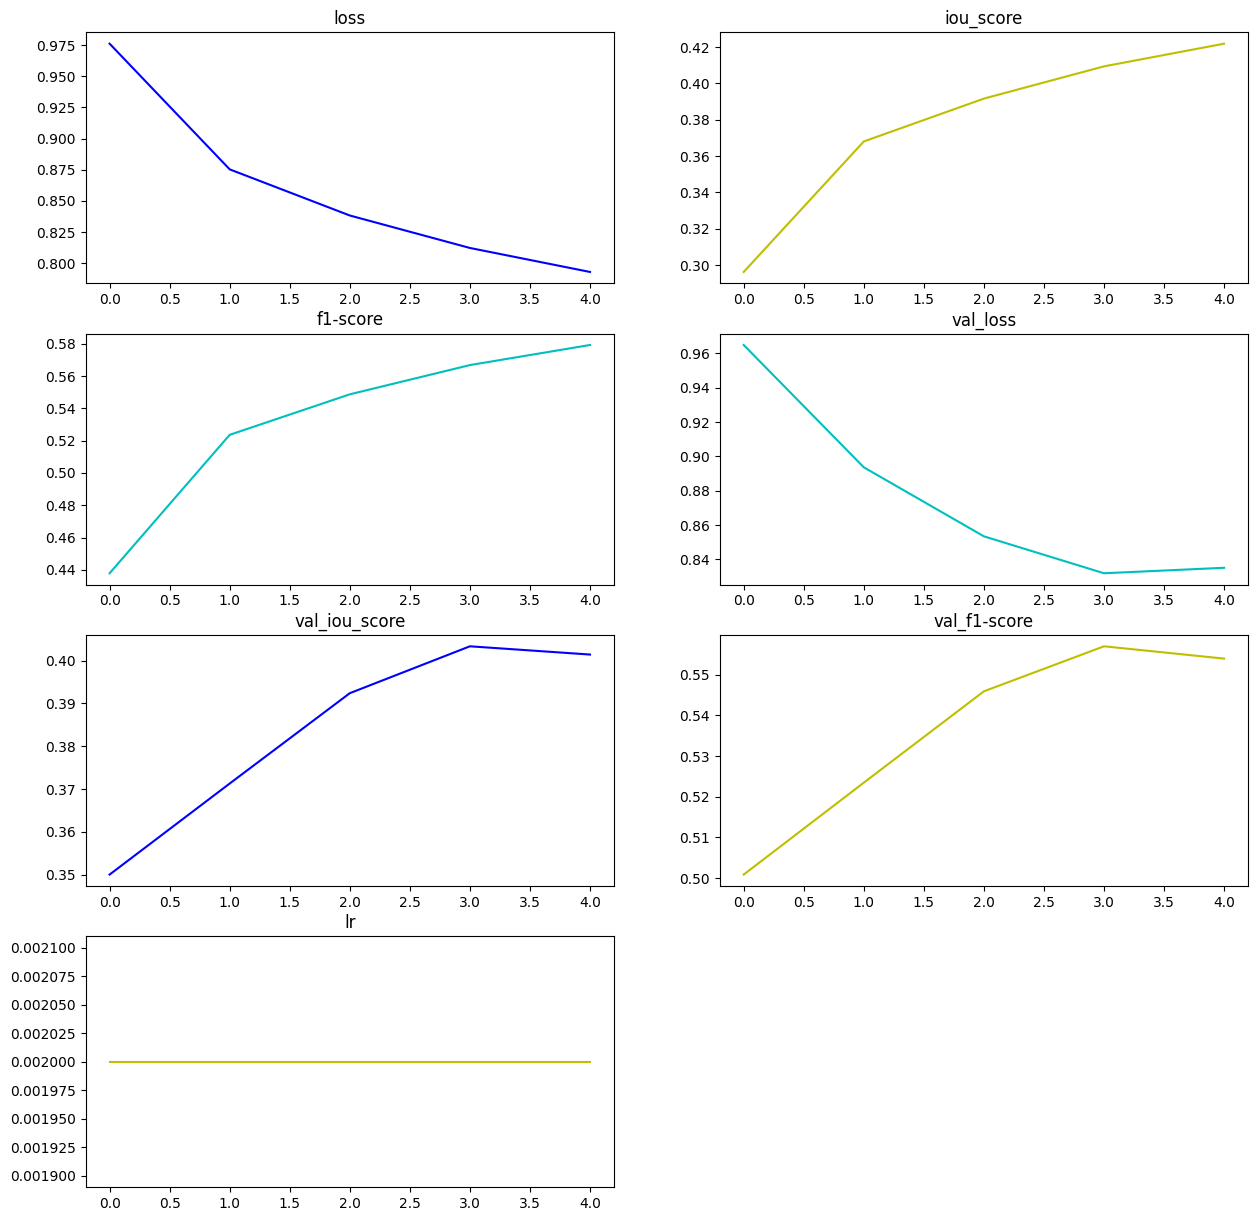

In [ ]:
# Each of the learning curves for the model has been displayed separately
colors = "bgrcy"
plt.figure(figsize=(15,15))
for i in range(len(df_res.columns)):
    plt.subplot(4,2,i+1)
    df_res[df_res.columns[i]].plot(color=colors[random.randint(0,4)])
    plt.title(df_res.columns[i])
plt.show()

In [ ]:
# Thresholding function to be applied on the output
def threshold(x):
    if x>0.5:
        return 1
    else:
        return 0

# Making the function applicable to a numpy array
exp =np.vectorize(threshold)

In [ ]:
# Function to compare the predicted mask to the actual mask
# Function simply plots the actual and predicted mask of the 4 classes
# side by side
def compare_masks(actual,predicted):
    plt.figure(figsize=(15,15))
    j = 0
    for i in range(8):
        plt.subplot(4,2,i+1)
        if (i+1)%2!=0:
            plt.title(f"Actual-{labels[j]}")
            plt.imshow(actual[:,:,j])
        else:
            plt.title(f"Predicted-{labels[j]}")
            plt.imshow(predicted[:,:,j])
            j+=1
    plt.show()

In [ ]:
# Function to predict and visualise the outputs of the models
# Simply combine the above 2 functions together
def predict(df):
    data = preprocess(df)
    output = model.predict(data[0][0][ np.newaxis, ...])
    output = exp(output)
    compare_masks(data[0][1],output[0])
    return

In [ ]:
# Function to display the actual image
def display_img(img_name):
    path = os.path.join(img_dir,img_name)
    img = cv2.imread(path,1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

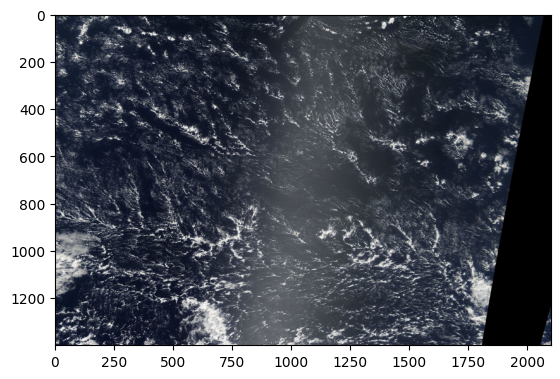

In [ ]:
# Displaying the actual image
display_img(train_df["image"][5107])

0 completed
1/1 [==============================] - 5s 5s/step


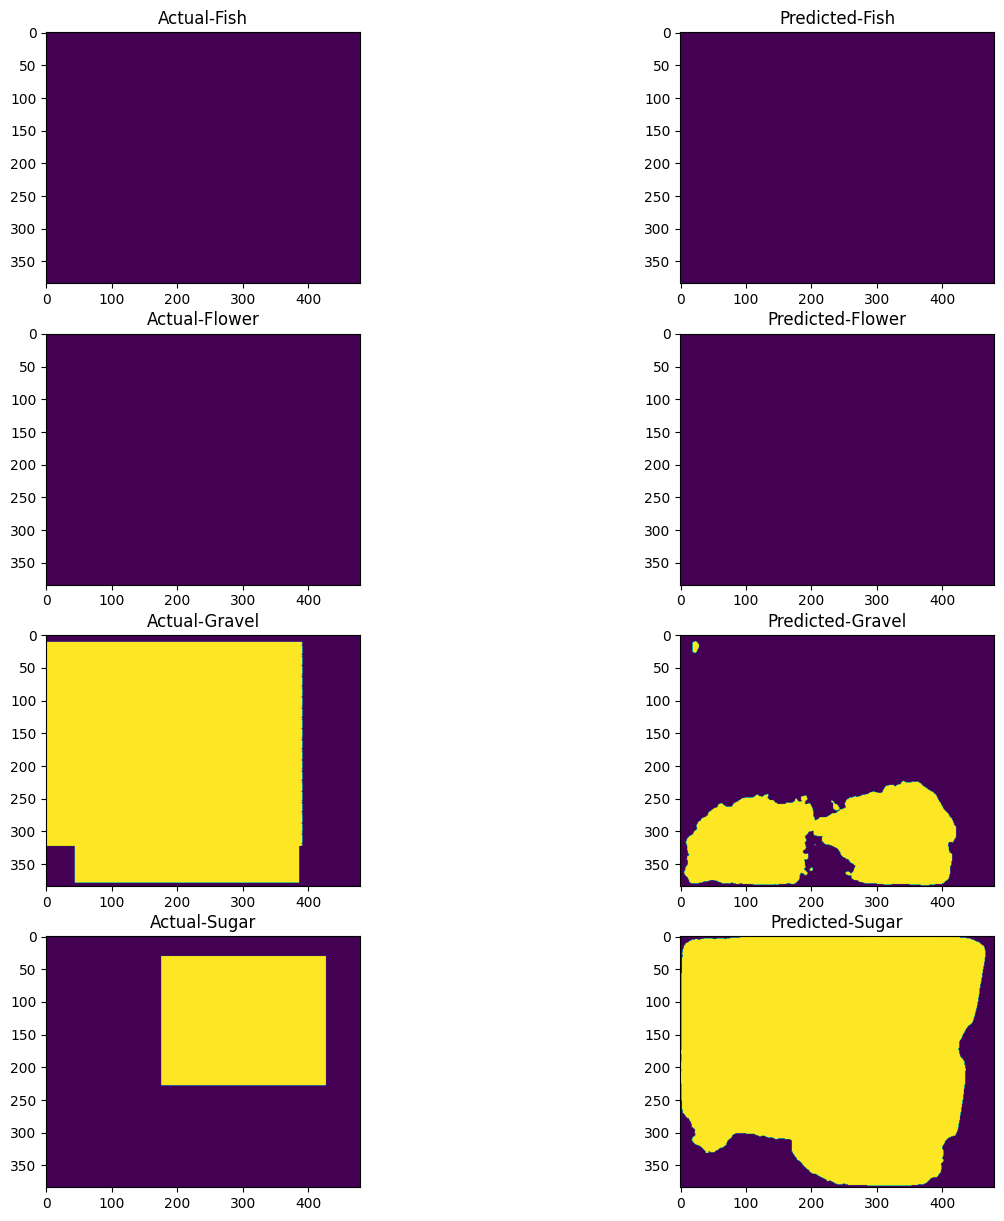

In [ ]:
# Performance of model on image
test = pd.DataFrame(train_df.iloc[5107]).T.reset_index().drop("index",axis=1)
predict(test)

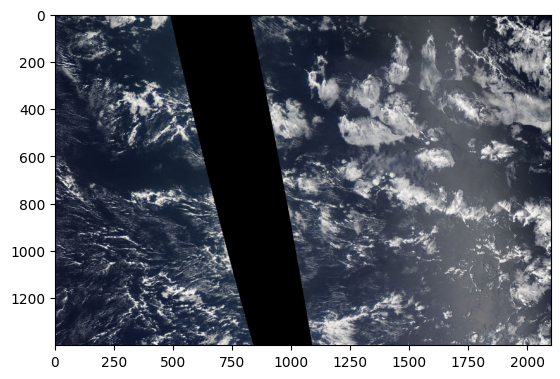

In [ ]:
# Displaying the actual image
display_img(train_df["image"][5101])

0 completed
1/1 [==============================] - 0s 71ms/step


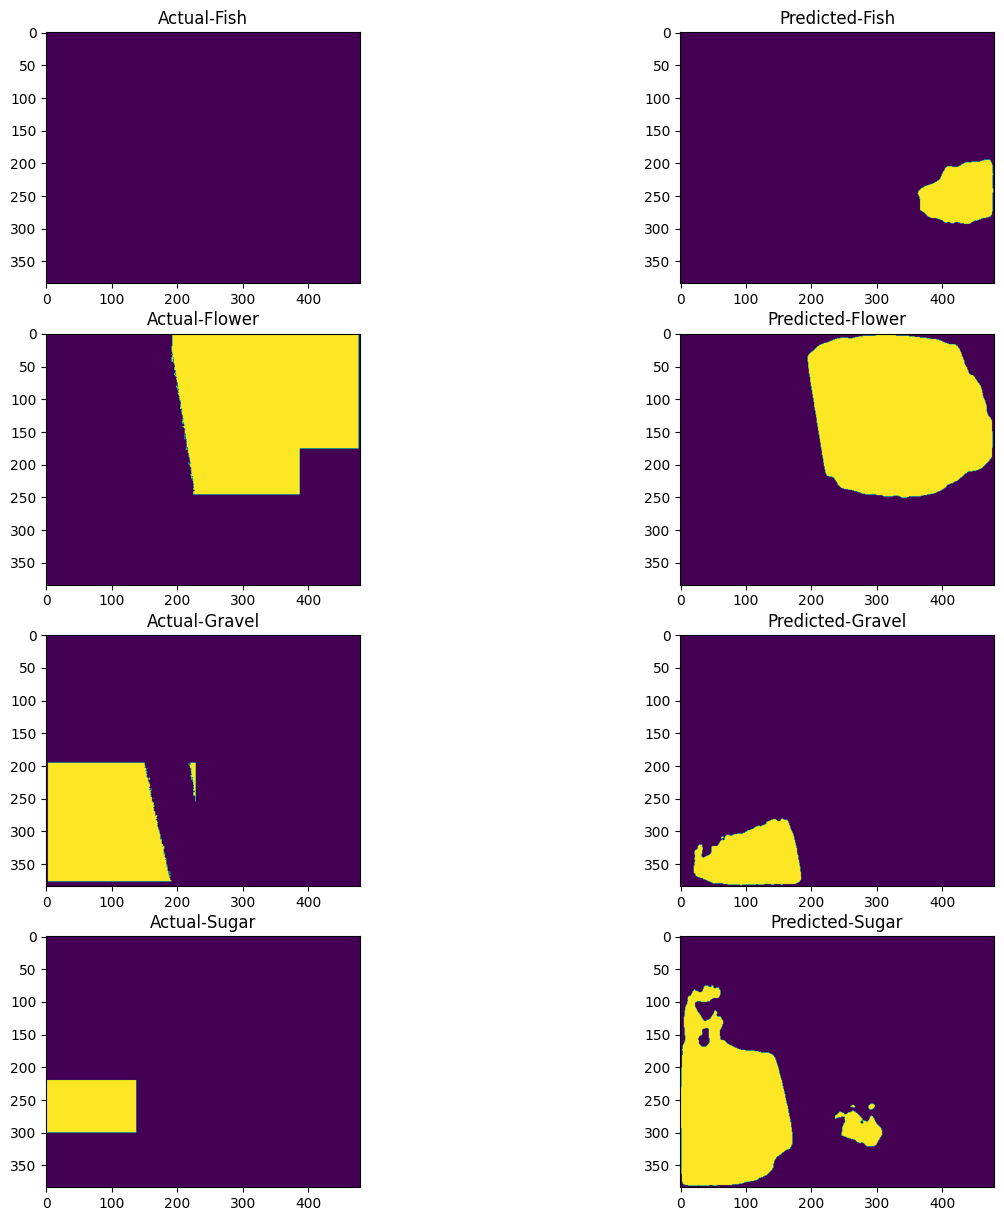

In [ ]:
test = pd.DataFrame(train_df.iloc[5101]).T.reset_index().drop("index",axis=1)
predict(test)

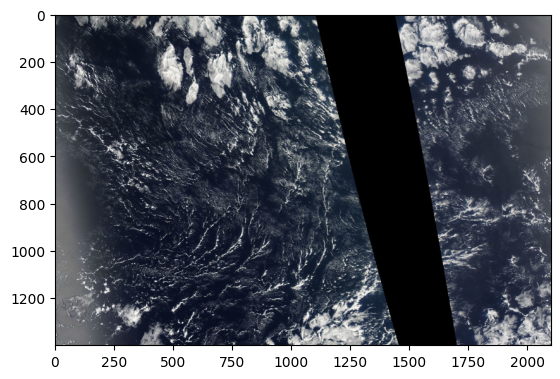

In [ ]:
# Displaying the actual image
display_img(train_df["image"][5105])

0 completed
1/1 [==============================] - 0s 88ms/step


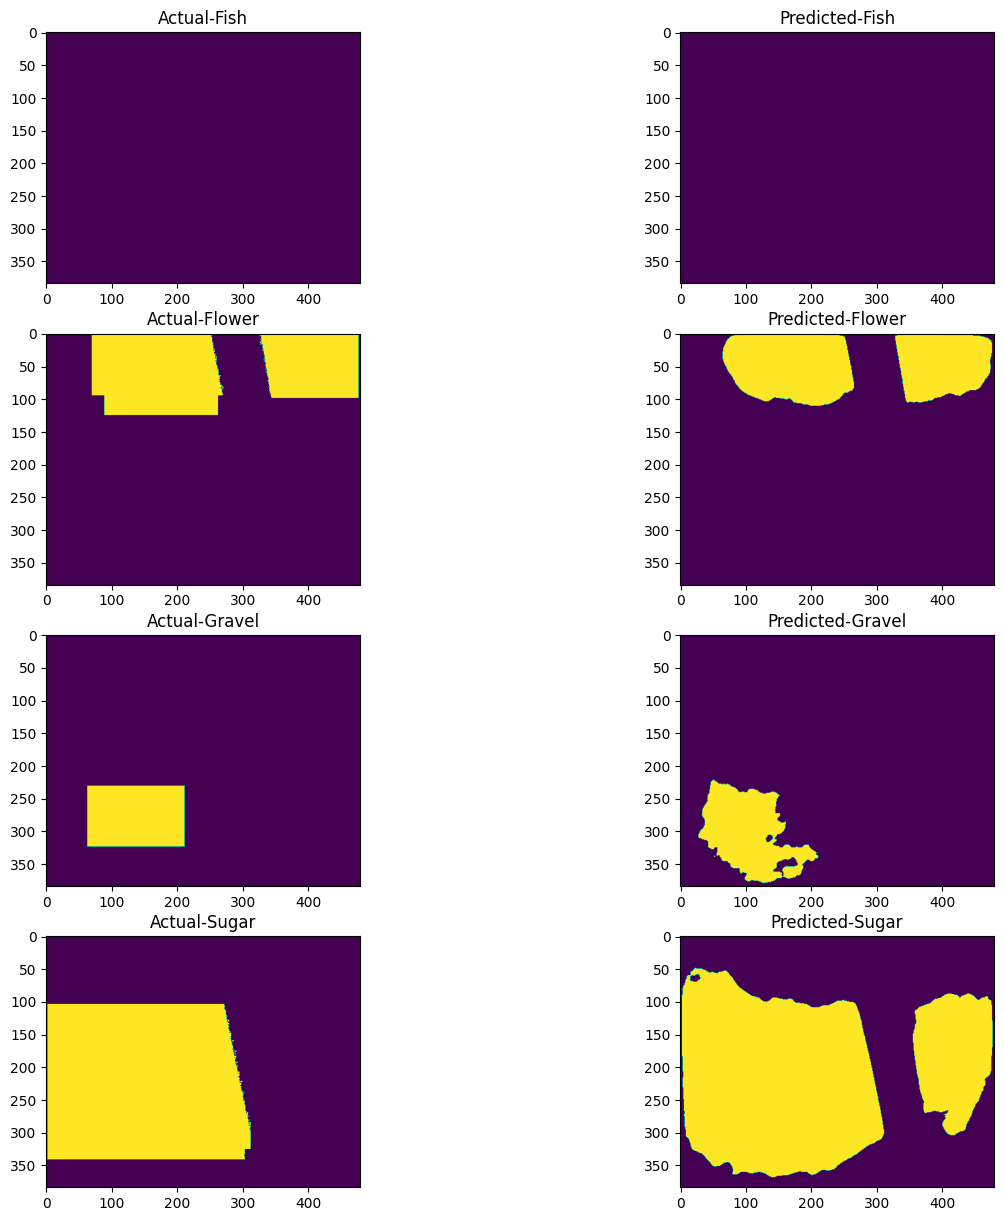

In [ ]:
test = pd.DataFrame(train_df.iloc[5105]).T.reset_index().drop("index",axis=1)
predict(test)

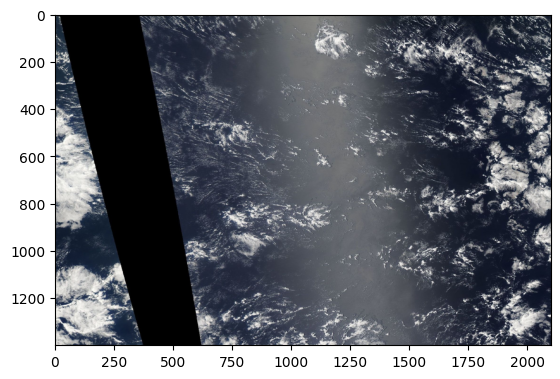

In [ ]:
# Displaying the actual image
display_img(train_df["image"][5108])

0 completed
1/1 [==============================] - 0s 55ms/step


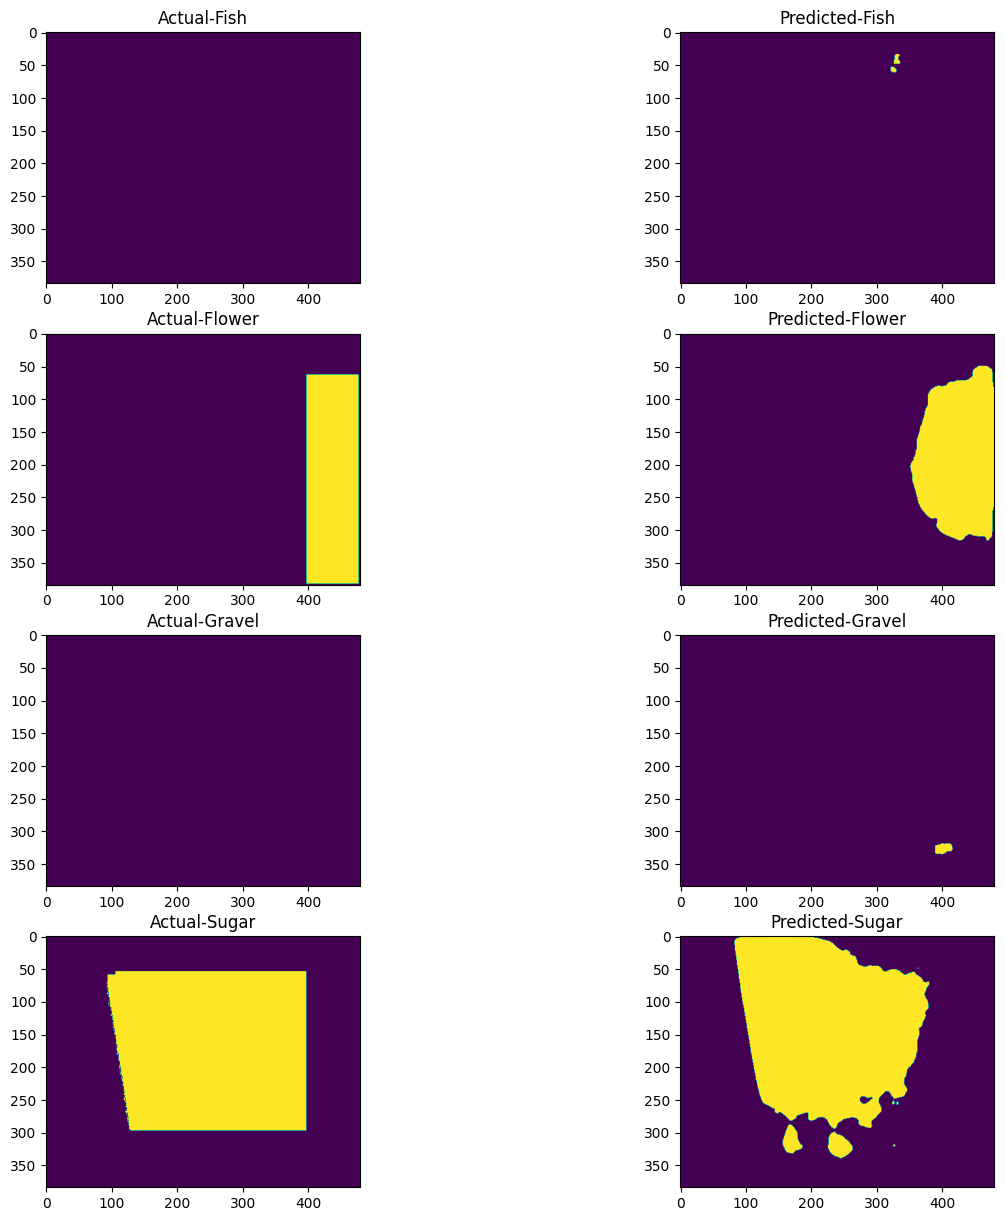

In [ ]:
test = pd.DataFrame(train_df.iloc[5108]).T.reset_index().drop("index",axis=1)
predict(test)

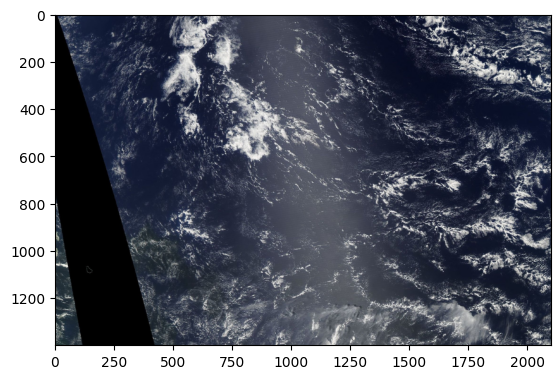

In [ ]:
# Displaying the actual image
display_img(train_df["image"][5117])

0 completed
1/1 [==============================] - 0s 78ms/step


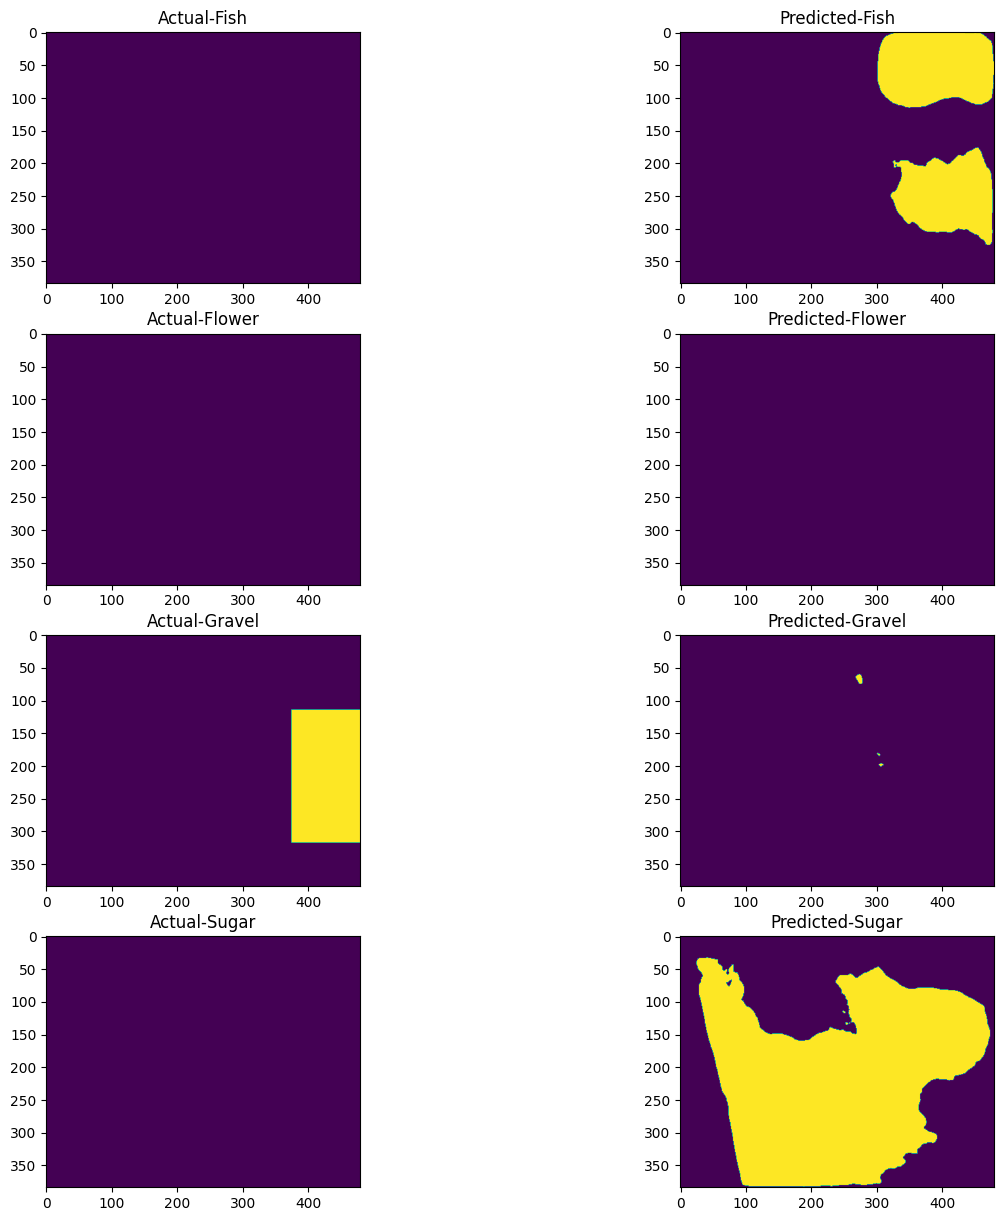

In [ ]:
test = pd.DataFrame(train_df.iloc[5117]).T.reset_index().drop("index",axis=1)
predict(test)

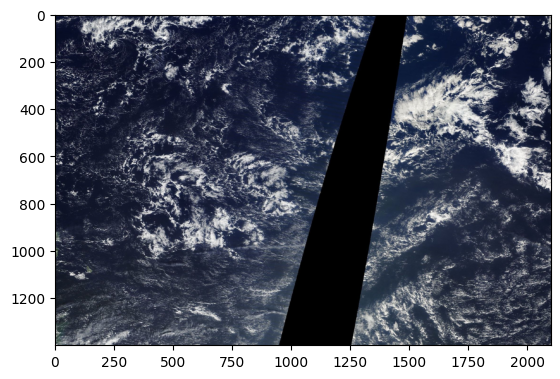

In [ ]:
# Displaying the actual image
display_img(train_df["image"][510])

0 completed
1/1 [==============================] - 0s 53ms/step


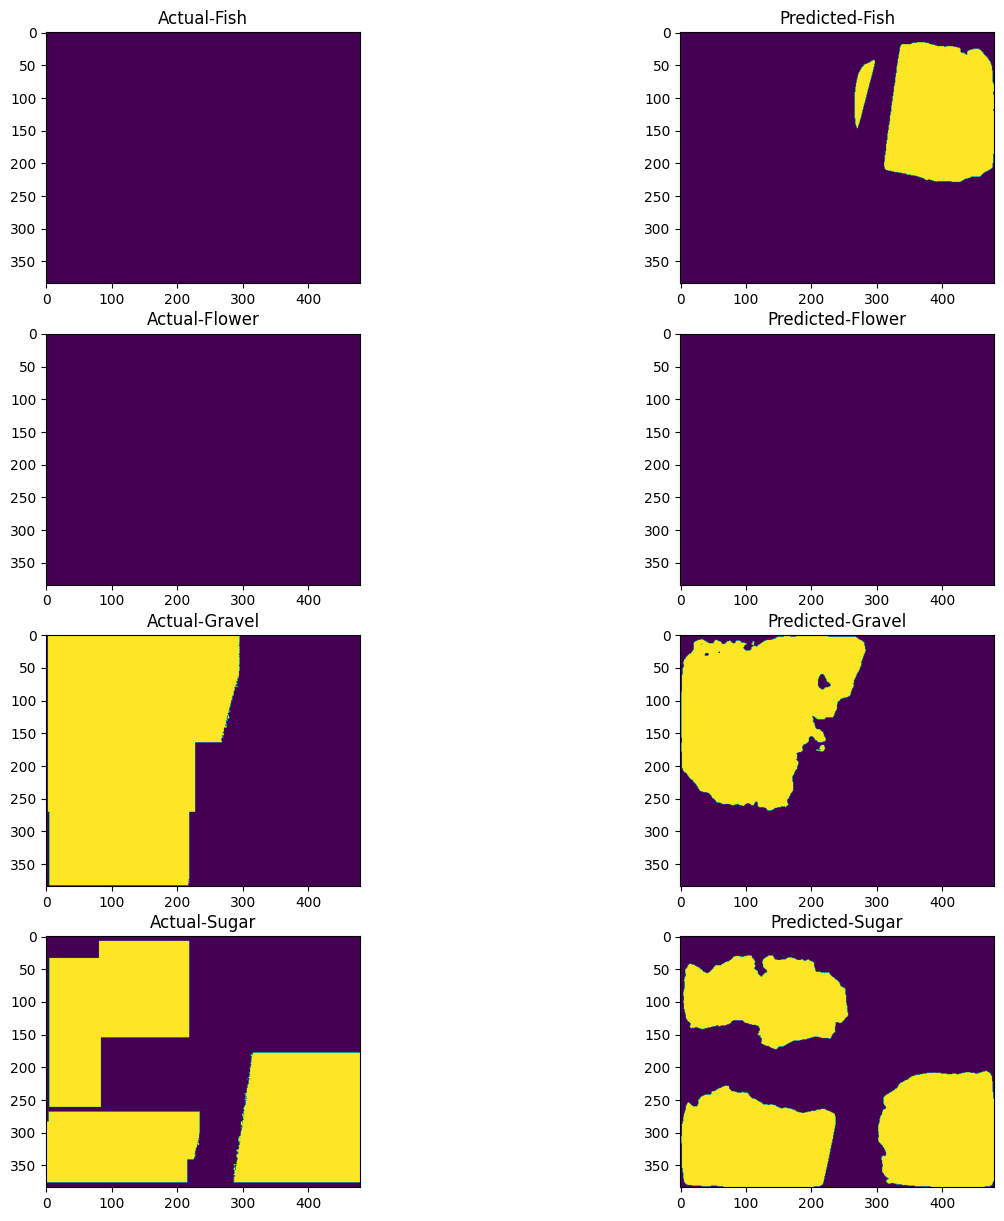

In [ ]:
test = pd.DataFrame(train_df.iloc[510]).T.reset_index().drop("index",axis=1)
predict(test)